In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [23]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [26]:
df.duplicated().sum()

0

In [27]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [28]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [29]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [30]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)

In [33]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [40]:
from sklearn.model_selection import train_test_split
X  = df.drop(columns = ['Exited'])
y = df['Exited']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [42]:
X_test.shape

(2000, 11)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [44]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [70]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [71]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [75]:
history = model.fit(X_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6984 - loss: 0.6101 - val_accuracy: 0.7975 - val_loss: 0.4918
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7952 - loss: 0.4770 - val_accuracy: 0.8006 - val_loss: 0.4579
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8082 - loss: 0.4315 - val_accuracy: 0.8100 - val_loss: 0.4437
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8104 - loss: 0.4396 - val_accuracy: 0.8106 - val_loss: 0.4365
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8188 - loss: 0.4192 - val_accuracy: 0.8156 - val_loss: 0.4285
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8204 - loss: 0.4154 - val_accuracy: 0.8156 - val_loss: 0.4231
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8247 - loss: 0.4073 - val_accuracy: 0.8169 - val_loss: 0.4172
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.3993 - val_accu

In [76]:
model.layers[0].get_weights()

[array([[-2.12251231e-01,  1.40364125e-01,  6.43892260e-03,
         -6.44955486e-02, -3.94777469e-02, -2.00628042e-01,
          6.81496382e-01,  2.75200933e-01,  4.49635386e-01,
          3.16880345e-01, -1.60220340e-01],
        [-7.04349101e-01, -1.36064626e-02,  5.68215489e-01,
          3.49866241e-01, -6.02477252e-01,  8.23871493e-01,
         -8.93268049e-01,  3.93232912e-01,  1.09848869e+00,
         -6.97017431e-01, -4.18980300e-01],
        [-3.45698707e-02,  1.19207665e-01, -8.89607519e-02,
         -3.01279753e-01, -1.07840337e-01,  9.38039869e-02,
         -1.78483829e-01, -2.56794721e-01,  3.65515560e-01,
          4.12512943e-02,  4.18517500e-01],
        [ 3.19696158e-01, -6.32950544e-01,  3.27047408e-01,
         -1.87364548e-01,  4.28525906e-04,  6.24055369e-03,
          1.73902035e-01, -4.01046276e-02, -1.08136252e-01,
         -1.54696390e-01,  2.69281745e-01],
        [-2.35327020e-01, -3.83855924e-02,  1.26219797e+00,
         -9.49498355e-01, -1.59715619e-02, -

In [77]:
model.layers[1].get_weights()

[array([[-5.02424594e-03,  6.88719377e-02, -1.20152593e-01,
          1.61176354e-01,  2.36200348e-01,  6.75115645e-01,
         -2.96976510e-02,  5.86879075e-01,  2.76867986e-01,
          3.89957309e-01,  4.40397292e-01],
        [ 3.75849567e-03,  1.85551465e-01,  6.10760093e-01,
          2.57064253e-01, -5.04888482e-02,  6.57107979e-02,
          6.18211508e-01, -1.23159505e-01,  9.04660951e-03,
         -3.19835275e-01,  1.19846137e-02],
        [-1.66890800e-01,  6.68333694e-02, -4.16028760e-02,
         -9.99911427e-02,  1.03108382e+00, -2.17305884e-01,
         -1.61144388e+00, -5.62422454e-01,  8.03848624e-01,
          2.82680690e-02, -7.53459811e-01],
        [-4.72719580e-01,  6.58205330e-01, -4.83640283e-01,
         -1.51350498e-01, -1.92358214e-02, -1.61417425e-01,
          5.55011153e-01,  5.86363792e-01,  2.94400603e-02,
         -3.17121267e-01,  3.23046088e-01],
        [ 1.09643780e-01, -1.80855945e-01,  3.16482633e-01,
          2.72943497e-01,  7.54315928e-02,  

In [78]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [79]:
y_pred = np.where(y_log>0.5,1,0)

In [80]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8645

In [83]:
import matplotlib.pyplot as plt

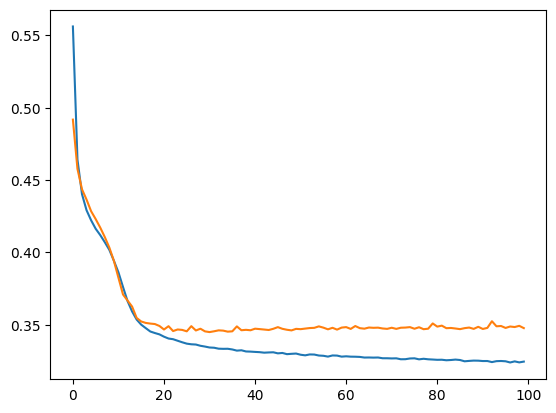

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

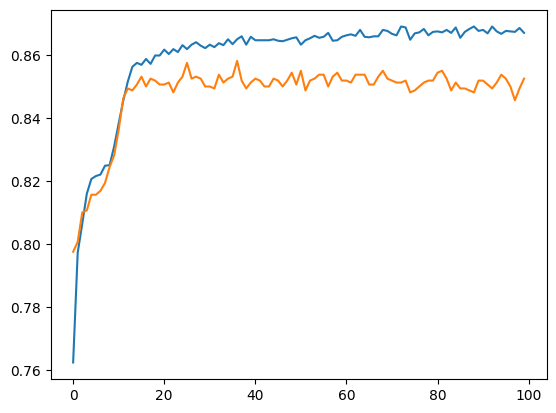

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])